In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install plotly

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objs as go

In [9]:
data = yf.download(tickers='BTC-USD')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [11]:
data.index = pd.to_datetime(data.index)
data.head().round(2)

,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [12]:
data.shape

(2934, 1)

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bitcoin price')

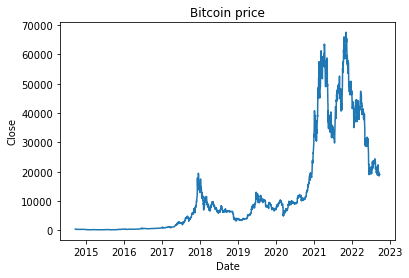

In [13]:
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.67
5% Critical Value: -2.86
p-value: 0.45


In [15]:
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(5.905019588567568, 0.01, 31, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 5.91
5% Critical Value: 0.46
p-value: 0.01


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


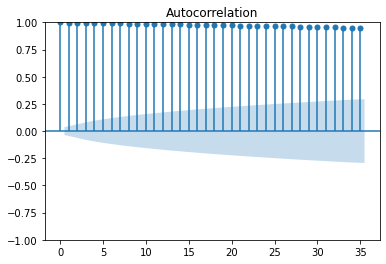

In [16]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


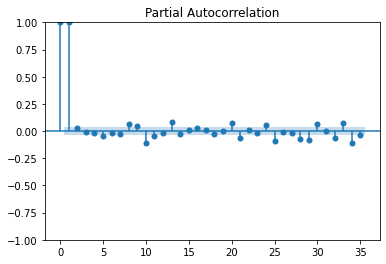

In [17]:
plot_pacf(data.Close)
plt.show()

In [18]:
#First, use differnce method
data['differ'] = data['Close'].diff()

/var/folders/_3/p7g0czqs2mn2vrf8z2svm6ph0000gn/T/ipykernel_4237/1269765865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['differ'] = data['Close'].diff()


In [19]:
data.head()

,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bitcoin price')

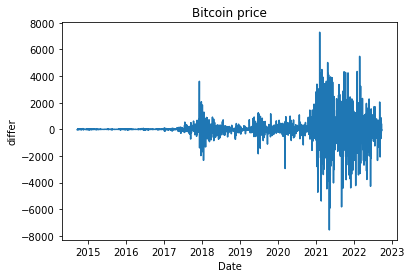

In [20]:
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [21]:
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -9.00
5% Critical Value: -2.86
p-value: 0.00


In [25]:
#By looking at the partial autocorrelation, the model will be first order
import statsmodels.api as sm
model_AR1 = sm.tsa.arima.ARIMA(data.differ.dropna(), order=(1,0,0))
result_AR1 = model_AR1.fit()
result_AR1.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2933
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -23776.934
Date:                Wed, 28 Sep 2022   AIC                          47559.867
Time:                        15:58:28   BIC                          47577.819
Sample:                    09-18-2014   HQIC                         47566.332
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3436     14.575      0.435      0.663     -22.224      34.911
ar.L1         -0.0265      0.010     -2.732      0.006      -0.046      -0.007
sigma2      6.443e+05   5503.388    117.065      0.000    6.33e+05    6.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             34403.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            3805.73   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_AR2 = sm.tsa.arima.ARIMA(data.differ.dropna(), order=(10,0,0))
result_AR2 = model_AR2.fit()
result_AR2.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2933
Model:                ARIMA(10, 0, 0)   Log Likelihood              -23755.874
Date:                Wed, 28 Sep 2022   AIC                          47535.748
Time:                        15:59:00   BIC                          47607.553
Sample:                    09-18-2014   HQIC                         47561.606
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3436     16.790      0.378      0.706     -26.564      39.252
ar.L1         -0.0283      0.010     -2.855      0.004      -0.048      -0.009
ar.L2          0.0116      0.009      1.230      0.219      -0.007       0.030
ar.L3          0.0208      0.010      2.047      0.041       0.001       0.041
ar.L4          0.0330      0.008      3.883      0.000       0.016       0.050
ar.L5          0.0138      0.009      1.543      0.123      -0.004       0.031
ar.L6          0.0182      0.009      2.077      0.038       0.001       0.035
ar.L7         -0.0520      0.008     -6.361      0.000      -0.068      -0.036
ar.L8         -0.0374      0.008     -4.760      0.000      -0.053      -0.022
ar.L9          0.0847      0.009      9.278      0.000       0.067       0.103
ar.L10         0.0331      0.010      3.457      0.001       0.014       0.052
sigma2       6.37e+05   5580.873    114.139      0.000    6.26e+05    6.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33860.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            3789.75   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model_MA1 = sm.tsa.arima.ARIMA(data.differ.dropna(), order=(0,1,0))
result_MA1 = model_MA2.fit()
result_MA1.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2933
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -24824.918
Date:                Wed, 28 Sep 2022   AIC                          49651.835
Time:                        16:00:42   BIC                          49657.818
Sample:                    09-18-2014   HQIC                         49653.990
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.323e+06   1.26e+04    104.769      0.000     1.3e+06    1.35e+06
===================================================================================
Ljung-Box (L1) (Q):                 780.89   Jarque-Bera (JB):             20590.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            4412.45   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_MA2 = sm.tsa.arima.ARIMA(data.differ.dropna(), order=(0,10,0))
result_MA2 = model_MA2.fit()
result_MA2.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2933
Model:                ARIMA(0, 10, 0)   Log Likelihood              -41501.672
Date:                Wed, 28 Sep 2022   AIC                          83005.344
Time:                        16:00:49   BIC                          83011.324
Sample:                    09-18-2014   HQIC                         83007.498
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.255e+11   1.11e+09    113.262      0.000    1.23e+11    1.28e+11
===================================================================================
Ljung-Box (L1) (Q):                2434.02   Jarque-Bera (JB):             29016.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            4595.27   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
len(data)

2934

In [37]:
# Step 1: Split the dataset:
test_size = 500

df_train = data['differ'][:-test_size]
df_test = data['differ'][-test_size:]

In [38]:
print(len(df_train))
print(len(df_test))

2434
500


In [39]:
df_test.head()

Date
2021-05-17   -2918.546875
2021-05-18    -628.109375
2021-05-19   -5906.960938
2021-05-20    3780.296875
2021-05-21   -3478.046875
Name: differ, dtype: float64

In [41]:
model_AR1 = sm.tsa.arima.ARIMA(df_train.dropna(), order=(1,0,0))
result_AR1 = model_AR1.fit()
result_AR1.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2433
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -18940.055
Date:                Wed, 28 Sep 2022   AIC                          37886.110
Time:                        16:02:59   BIC                          37903.501
Sample:                    09-18-2014   HQIC                         37892.432
                         - 05-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9062     11.667      1.620      0.105      -3.961      41.773
ar.L1         -0.0275      0.008     -3.398      0.001      -0.043      -0.012
sigma2      3.383e+05   2063.677    163.954      0.000    3.34e+05    3.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            182771.57
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):            1684.81   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
predict_AR_1=result_AR1.predict(df_test.index[0],df_test.index[-1])
predict_AR_1

2021-05-17    27.779194
2021-05-18    18.662454
2021-05-19    18.912870
2021-05-20    18.905991
2021-05-21    18.906180
                ...    
2022-09-24    18.906175
2022-09-25    18.906175
2022-09-26    18.906175
2022-09-27    18.906175
2022-09-28    18.906175
Freq: D, Name: predicted_mean, Length: 500, dtype: float64

In [44]:
from statsmodels.tools.eval_measures import rmse
RMSE_AR_1 = rmse(df_test,predict_AR_1)
RMSE_AR_1

1461.0390932106552

In [46]:
model_MA1 = sm.tsa.arima.ARIMA(df_train.dropna(), order=(0,1,0))
result_MA1 = model_MA1.fit()
result_MA1.summary()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2433
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -19809.443
Date:                Wed, 28 Sep 2022   AIC                          39620.886
Time:                        16:04:17   BIC                          39626.683
Sample:                    09-18-2014   HQIC                         39622.994
                         - 05-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.955e+05   4893.781    142.117      0.000    6.86e+05    7.05e+05
===================================================================================
Ljung-Box (L1) (Q):                 700.52   Jarque-Bera (JB):             98841.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            6106.27   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
predict_MA_1=result_MA1.predict(df_test.index[0],df_test.index[-1])
predict_MA_1

2021-05-17   -304.128906
2021-05-18   -304.128906
2021-05-19   -304.128906
2021-05-20   -304.128906
2021-05-21   -304.128906
                 ...    
2022-09-24   -304.128906
2022-09-25   -304.128906
2022-09-26   -304.128906
2022-09-27   -304.128906
2022-09-28   -304.128906
Freq: D, Name: predicted_mean, Length: 500, dtype: float64

In [49]:
from statsmodels.tools.eval_measures import rmse
RMSE_MA_1 = rmse(df_test,predict_MA_1)
RMSE_MA_1

1480.2948481096737

In [50]:
from statsmodels.tools.eval_measures import aic
import numpy as np

In [57]:
Models = pd.DataFrame({'Models': ['AR','MA'],'RMSE': [RMSE_AR_1, RMSE_MA_1], 'AIC': [result_AR1.aic, result_MA1.aic], 'BIC': [result_AR1.bic, result_MA1.bic]})
Models

,Models,RMSE,AIC,BIC
0,AR,1461.039093,37886.110139,37903.50078
1,MA,1480.294848,39620.886341,39626.68281


In [58]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 323.0 kB/s eta 0:00:0000:0100:01


In [59]:
import pmdarima as pm
from pmdarima import auto_arima
data_arima=data['differ'].dropna()

In [60]:
data_arima.isnull().sum()

0

In [61]:
model = auto_arima(data_arima.dropna(), start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=51717.311, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=49675.041, Time=3.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.30 sec


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=50806.110, Time=0.72 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=49417.848, Time=21.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=29.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=50294.025, Time=4.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=49072.423, Time=23.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=49314.408, Time=4.37 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=35.22 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.69 sec


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=24.62 sec


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=24.44 sec
 ARIMA(2,1,0)(2,1,0)[12] intercept   : AIC=49074.423, Time=20.49 sec

Best model:  ARIMA(2,1,0)(2,1,0)[12]          
Total fit time: 210.076 seconds


In [62]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2933
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -24531.211
Date:                            Wed, 28 Sep 2022   AIC                          49072.423
Time:                                    16:10:29   BIC                          49102.320
Sample:                                09-18-2014   HQIC                         49083.192
                                     - 09-28-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6814      0.009    -79.449      0.000      -0.698      -0.665
ar.L2         -0.3351      0.008   

In [63]:
def model_ARMA(order_list, var):
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(var, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [64]:
p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q]  

In [65]:
len(order_list)

25